In [78]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, classification_report


In [32]:
#installing xgboost
!pip install xgboost

In [7]:
# Loading Data Set

df = pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# checking messy parts of dataset

df.info()
df.describe(include="all").T.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48895.0,NaN,NaN,NaN,19017143.23618,10983108.38561,2539.0,9471945.0,19677284.0,29152178.5,36487245.0
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0


In [15]:
# Cleaning Data

# Filling missing reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Converting last_review to datatime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Days since last review
df['days_since_review'] = (pd.to_datetime("2019-12-31") - df['last_review']).dt.days
df['days_since_review'] = df['days_since_review'].fillna(df['days_since_review'].max())

# Removing extreme price outliers (capping at $500)
df = df[df['price'] <= 500]

# Removing extreme minimum_nights outliers (capping at 365)
df = df[df['minimum_nights'] <= 365]

print(df.shape)
df.head()


(47837, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,438.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,224.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,3200.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,179.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,407.0


In [17]:
# Defining Target

#Regression (Predicting Price)
target_reg = "price"

In [19]:
# Features

features = ['neighbourhood_group', 'room_type', 'minimum_nights',
            'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365',
            'days_since_review']

In [21]:
# Preprocessing Data
num_cols = ['minimum_nights','number_of_reviews','reviews_per_month',
            'calculated_host_listings_count','availability_365','days_since_review']
cat_cols = ['neighbourhood_group','room_type']

num_pipeline = Pipeline([('scale', StandardScaler())])
cat_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preproc = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

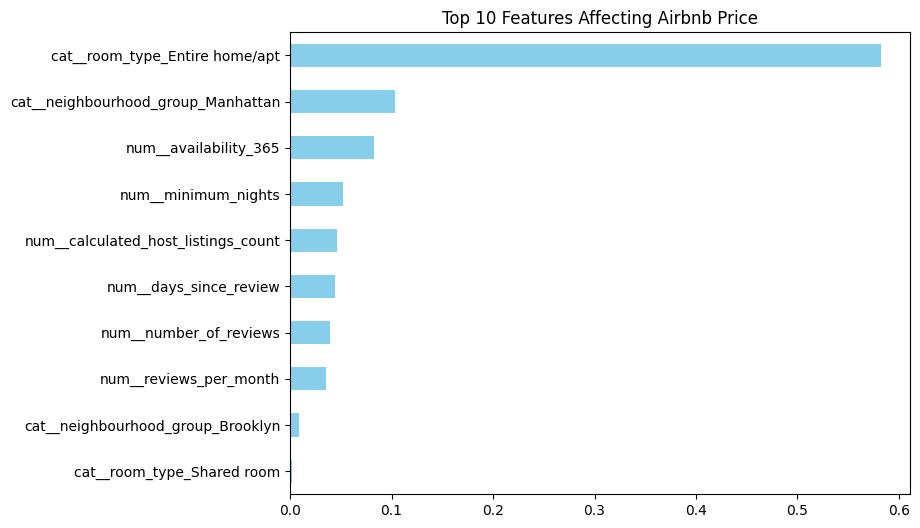

In [72]:
# Features Importance from RF
best_model = grid_rf.best_estimator_
feature_names = preproc.get_feature_names_out()
importances = best_model.named_steps['reg'].feature_importances_
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
#Plotting Top 10 Features
plt.figure(figsize=(8,6))
feat_importances.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Features Affecting Airbnb Price")
plt.gca().invert_yaxis()
plt.show()

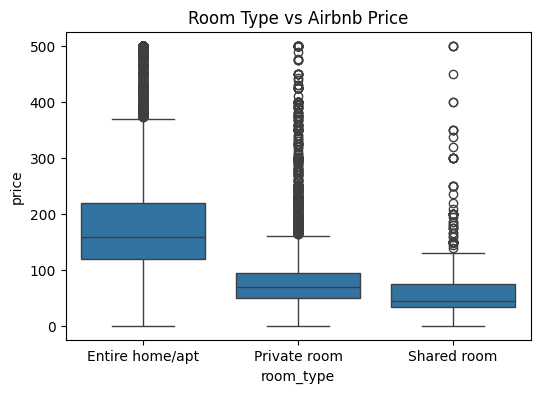

In [97]:
#Creating BoxPlots

df_plot = X_train.copy()
df_plot['price'] = y_train

# How Room Type Effects Price
plt.figure(figsize=(6,4))
sns.boxplot(x='room_type', y='price', data=df_plot)
plt.title("Room Type vs Airbnb Price")
plt.show()


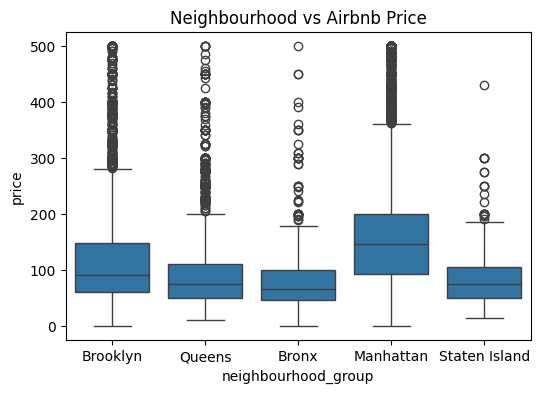

In [99]:
#Creating Boxplot showing how Neighbourhood Effects Price
plt.figure(figsize=(6,4))
sns.boxplot(x='neighbourhood_group', y='price', data=df_plot)
plt.title("Neighbourhood vs Airbnb Price")
plt.show()

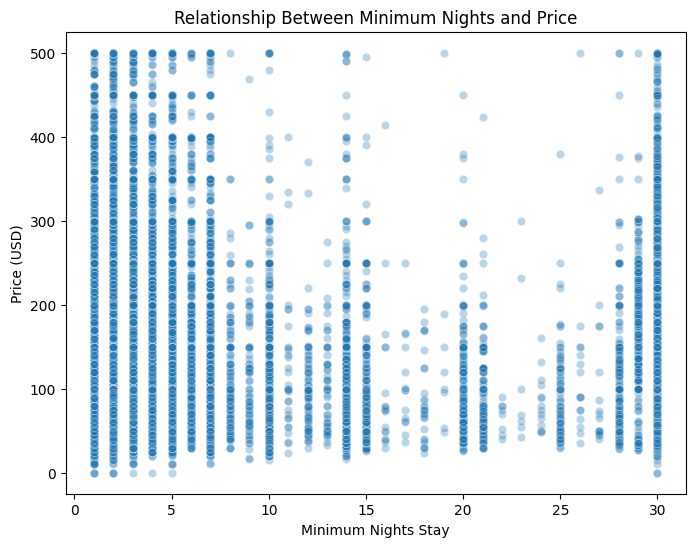

In [101]:
#Creating Plot to show Minimum Night Stay vs. Price
df_plot = df.copy()


df_plot = df_plot[(df_plot["minimum_nights"] <= 30) & (df_plot["price"] <= 1000)]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="minimum_nights",
    y="price",
    data=df_plot,
    alpha=0.3
)

plt.title("Relationship Between Minimum Nights and Price")
plt.xlabel("Minimum Nights Stay")
plt.ylabel("Price (USD)")
plt.show()

In [23]:
# Creating Regression Model
X = df[features]
y_reg = df[target_reg]

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

models_reg = {
    "LinearRegression": Pipeline([("preproc", preproc), ("reg", LinearRegression())]),
    "RandomForest": Pipeline([("preproc", preproc), ("reg", RandomForestRegressor(n_estimators=200, random_state=42))]),
    "XGBoost": Pipeline([("preproc", preproc), ("reg", xgb.XGBRegressor(n_estimators=200, random_state=42))])
}

for name, model in models_reg.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.3f}")

C:\Users\samho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\samho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost: RMSE=65.70, MAE=44.50, R2=0.445


C:\Users\samho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Hyperparameter Tuning (Using Random Forest Regression)
param_grid_rf = {
    "reg__n_estimators": [100, 300],
    "reg__max_depth": [None, 10, 20],
}
rf = Pipeline([("preproc", preproc), ("reg", RandomForestRegressor(random_state=42))])
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("Best params:", grid_rf.best_params_)
print("Best score:", -grid_rf.best_score_)

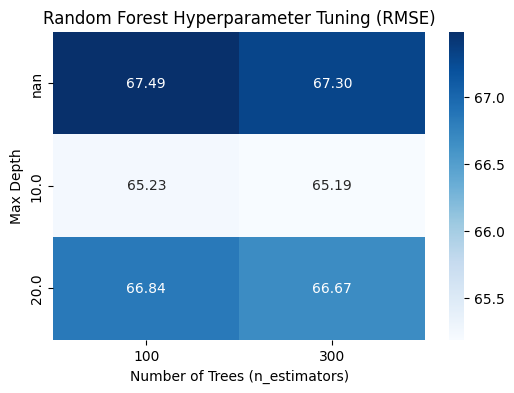

In [62]:
#Creating Heatmap for Random Forest
rf_results = pd.DataFrame(grid_rf.cv_results_)


rf_pivot = rf_results.pivot(
    index="param_reg__max_depth",
    columns="param_reg__n_estimators",
    values="mean_test_score"
)

plt.figure(figsize=(6,4))
sns.heatmap(-rf_pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Random Forest Hyperparameter Tuning (RMSE)")
plt.ylabel("Max Depth")
plt.xlabel("Number of Trees (n_estimators)")
plt.show()

In [33]:
# Hyperparameter Tuning (Using Linear Regression)
ridge = Pipeline([
    ("preproc", preproc),
    ("regressor", Ridge())
])

# Define hyperparameter grid
param_grid_ridge = {
    "regressor__alpha": [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Grid search
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_ridge.fit(X_train, y_train)

print("Best Ridge Parameters:", grid_ridge.best_params_)
print("Best Ridge RMSE:", -grid_ridge.best_score_)

Best Ridge Parameters: {'regressor__alpha': 1}
Best Ridge RMSE: 68.27080572846205


Matplotlib is building the font cache; this may take a moment.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


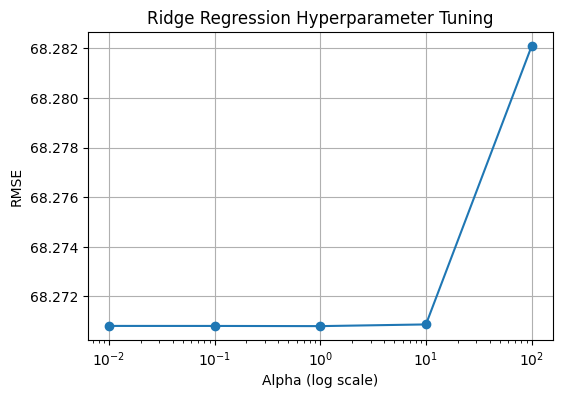

In [58]:
#Creating graph for Ridge Regression
ridge_results = pd.DataFrame(grid_ridge.cv_results_)

plt.figure(figsize=(6,4))
plt.plot(ridge_results["param_regressor__alpha"], -ridge_results["mean_test_score"], marker="o")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Ridge Regression Hyperparameter Tuning")
plt.grid(True)
plt.show()

In [40]:
# Hyperparameter Tuning (Using XGBoost)
xgb = Pipeline([
    ("preproc", preproc),
    ("regressor", XGBRegressor(
        objective="reg:squarederror",
        random_state=42
    ))
])

# Define Grid
param_grid_xgb = {
    "regressor__n_estimators": [100, 300, 500],
    "regressor__max_depth": [3, 5, 7],
    "regressor__learning_rate": [0.01, 0.1, 0.3],
    "regressor__subsample": [0.7, 1.0],
    "regressor__colsample_bytree": [0.7, 1.0]
}

# Grid search
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGBoost RMSE:", -grid_xgb.best_score_)

Best XGBoost Parameters: {'regressor__colsample_bytree': 0.7, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 7, 'regressor__n_estimators': 500, 'regressor__subsample': 0.7}
Best XGBoost RMSE: 64.66959140850823


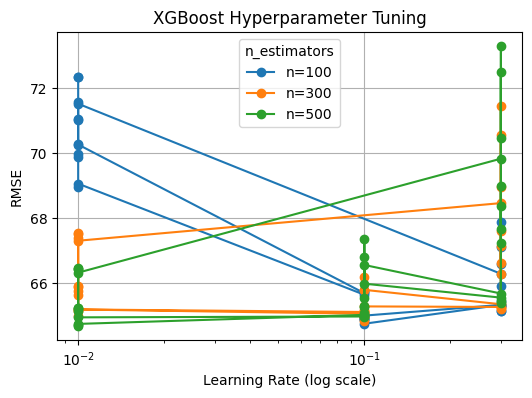

In [64]:
#Creating Scatterplot for XGBoost
xgb_results = pd.DataFrame(grid_xgb.cv_results_)

plt.figure(figsize=(6,4))
for n in xgb_results["param_regressor__n_estimators"].unique():
    subset = xgb_results[xgb_results["param_regressor__n_estimators"] == n]
    plt.plot(subset["param_regressor__learning_rate"], -subset["mean_test_score"], marker="o", label=f"n={n}")

plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("RMSE")
plt.title("XGBoost Hyperparameter Tuning")
plt.legend(title="n_estimators")
plt.grid(True)
plt.show()

C:\Users\samho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\samho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\samho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


              Model       RMSE
2           XGBoost  64.340583
1     Random Forest  64.697309
0  Ridge Regression  68.115463


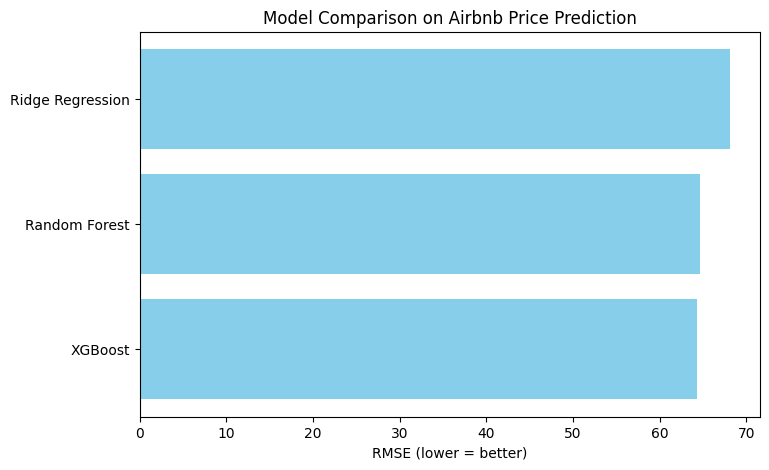

In [55]:
#Collect best models 
best_ridge = grid_ridge.best_estimator_
best_rf = grid_rf.best_estimator_ 
best_xgb = grid_xgb.best_estimator_

#Evaluating Test set
models = {
    "Ridge Regression": best_ridge,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append({"Model": name, "RMSE": rmse})

#Create DataFrame
comparison_df = pd.DataFrame(results).sort_values(by="RMSE")

print(comparison_df)

#Creating Bar Plot 
plt.figure(figsize=(8,5))
plt.barh(comparison_df["Model"], comparison_df["RMSE"], color="skyblue")
plt.xlabel("RMSE (lower = better)")
plt.title("Model Comparison on Airbnb Price Prediction")
plt.show()

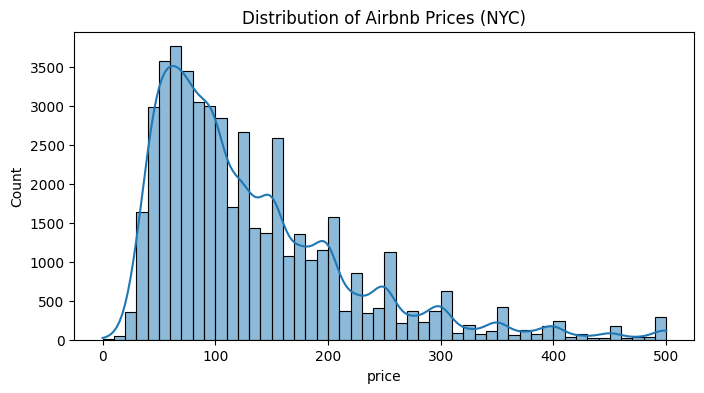

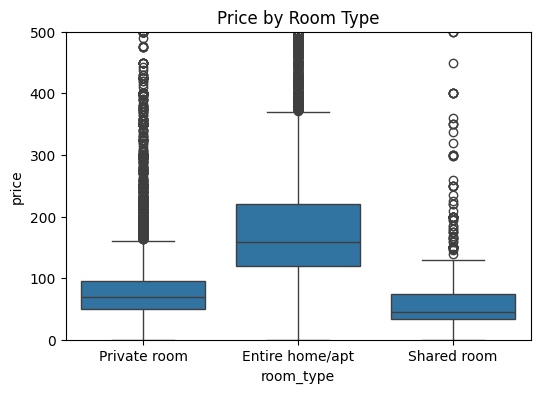

In [41]:
# Creating Visualization Models

# Distribution of price
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices (NYC)")
plt.show()

# Average price by room type
plt.figure(figsize=(6,4))
sns.boxplot(x="room_type", y="price", data=df)
plt.ylim(0,500)
plt.title("Price by Room Type")
plt.show()